In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pickle
print("Imported all!")

df = pd.read_csv('wines.csv').dropna()
print("Shape of the loaded dataset: {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df.head()

Imported all!
Shape of the loaded dataset: 178 rows and 13 columns.


,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# let us standardize all the data entries
standardized_data = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)
df_standardized.columns = [col + "_stand" for col in df.columns]

In [3]:
df_standardized.head()

,Alcohol_stand,Malic_Acid_stand,Ash_stand,Ash_Alkalinity_stand,Magnesium_stand,Total_Phenols_stand,Flavonoids_stand,Stilbenes_stand,Proanthocyanins_stand,Color_Intensity_stand,Hue_stand,OD280_stand,Proline_stand
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


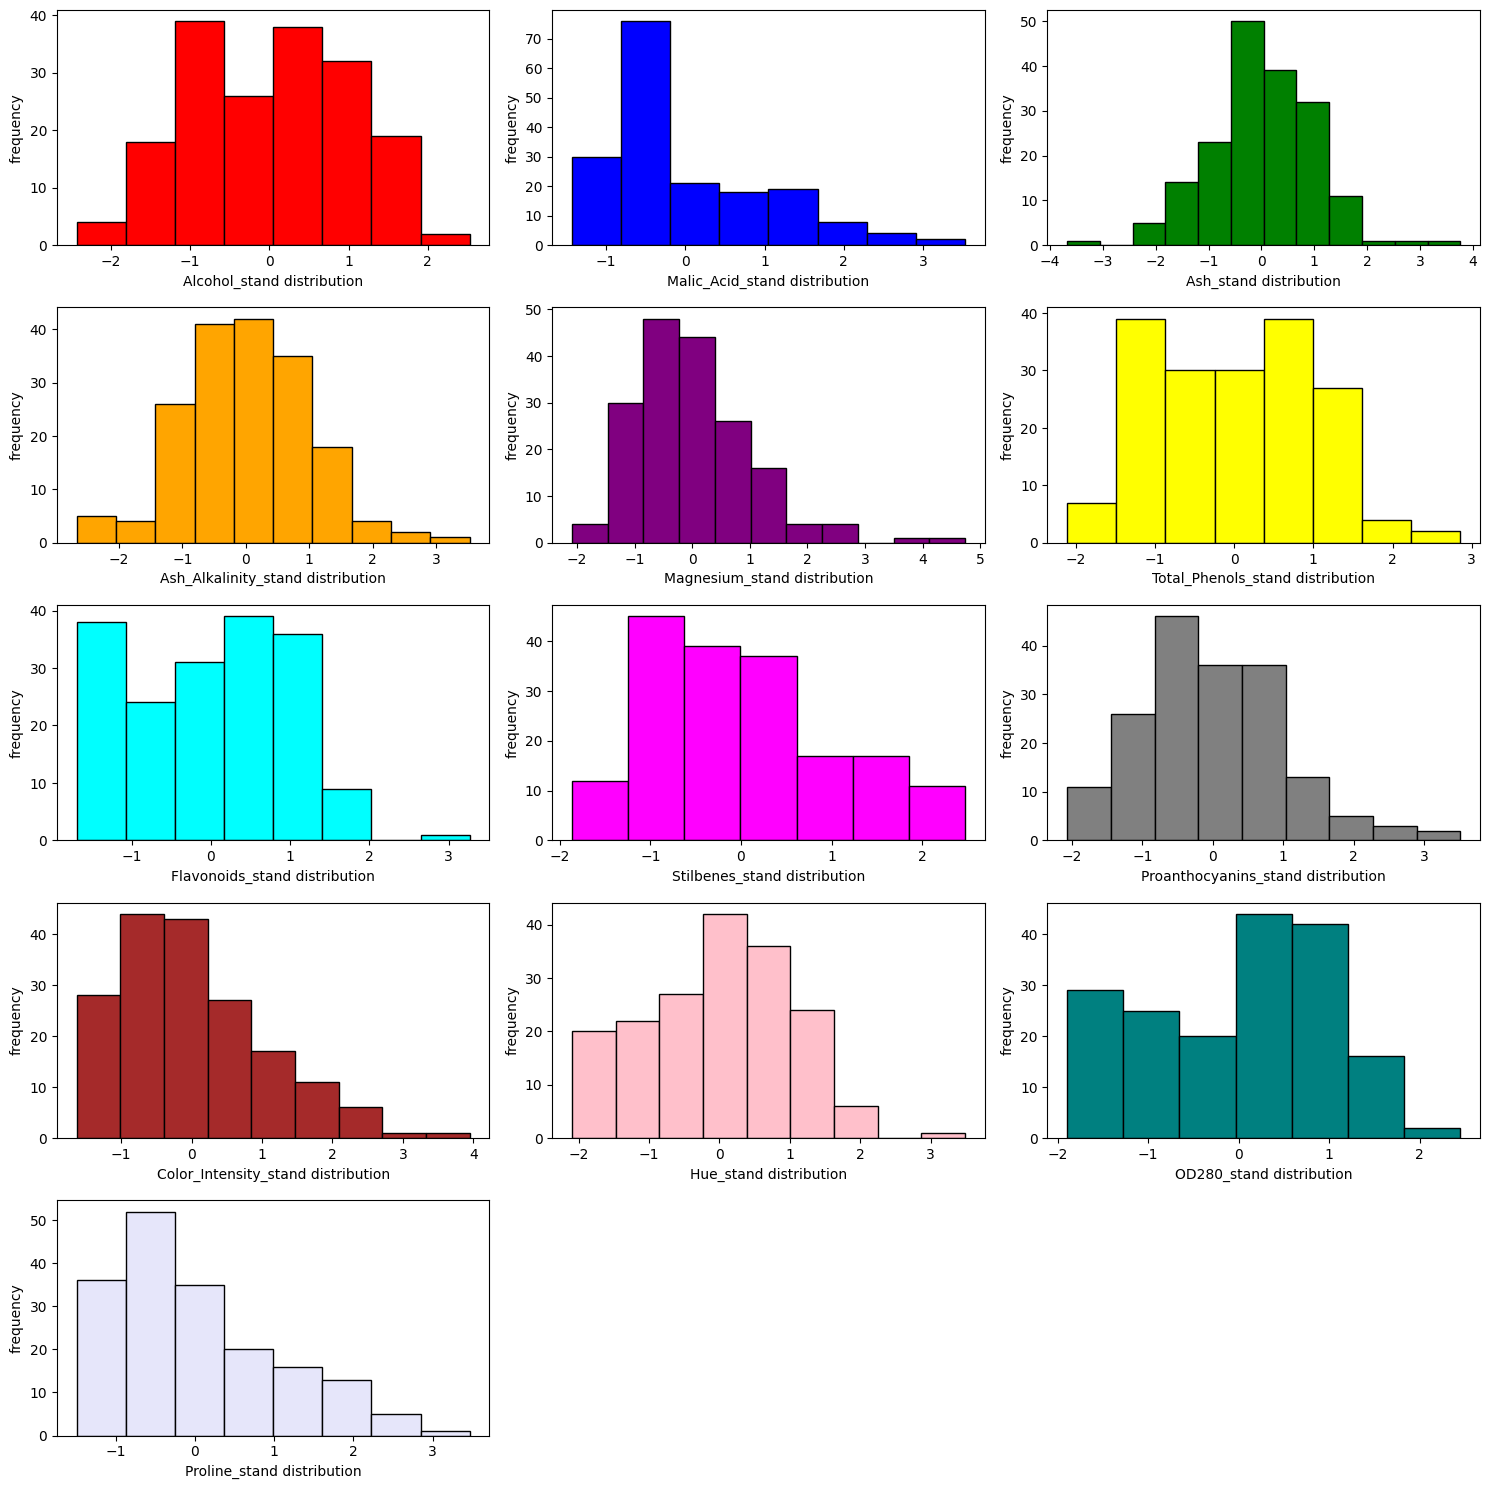

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_freq_dist(predictor, dataframe, color: str = "red", ax=None):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)

    if ax is None:
        ax = plt.gca()
    ax.hist(data, color=color, edgecolor="black", bins=bins) 
    ax.set_xlabel("{} distribution".format(predictor))
    ax.set_ylabel("frequency")


predictors = df_standardized.columns
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'teal', 'lavender']

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, predictor in enumerate(predictors):
    row_index = i // num_cols
    col_index = i % num_cols
    plot_freq_dist(predictor, dataframe=df_standardized, color=colors[i], ax=axes[row_index, col_index])

for i in range(len(predictors), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

### Question 1: Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_standardized)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component #1', 'principal component #2'])

In [6]:
principalDf.head()

,principal component #1,principal component #2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


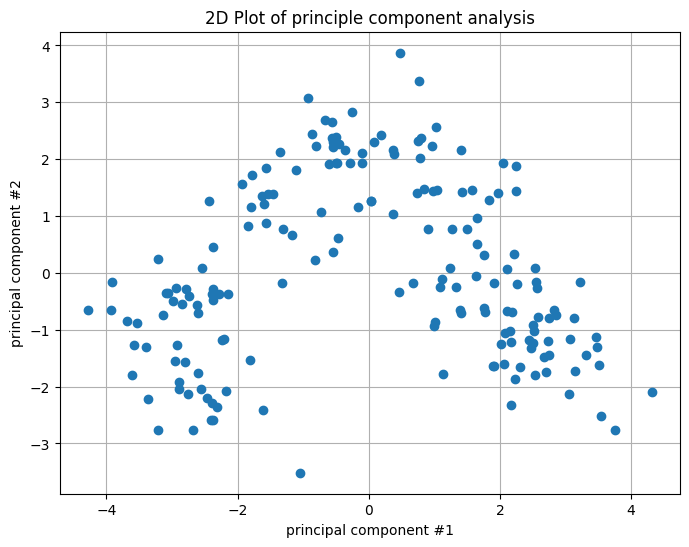

In [7]:
x = principalDf['principal component #1']
y = principalDf['principal component #2']

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='') 
plt.title('2D Plot of principle component analysis')
plt.xlabel('principal component #1')
plt.ylabel('principal component #2')
plt.grid(True)
plt.show()

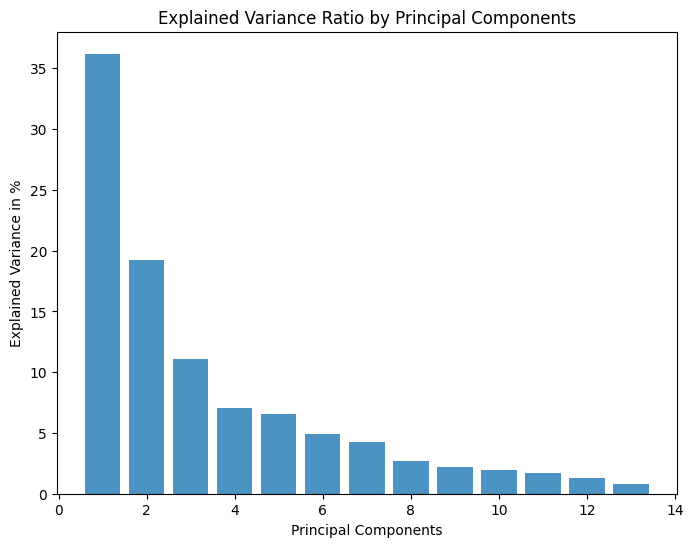

In [8]:
pca = PCA(n_components=df_standardized.shape[1])
principalComponents = pca.fit_transform(df_standardized)
# explained variance ratios: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')
plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

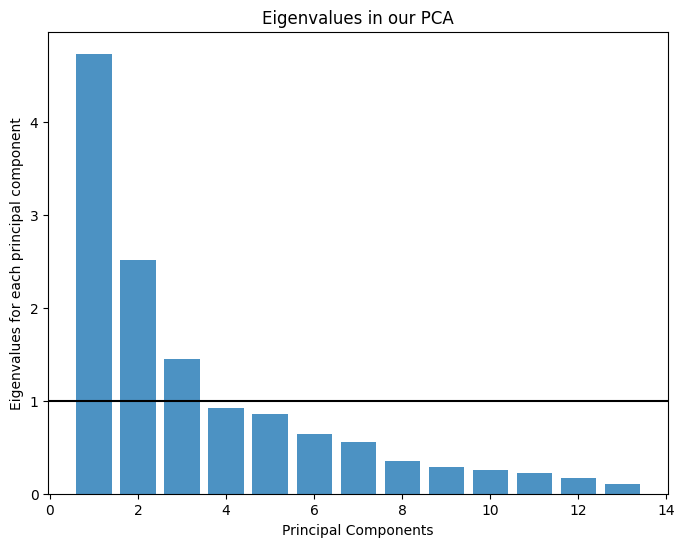

In [9]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0
plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()